# Research questions:
---
Shark related attacks according to sex.
- Shark related attacks according to sex, throughout history

Shark related deaths according to sex.
- Shark related deaths according to sex, throughout history

PIRATE KIDS:
- Shark related infant deaths according to sex throughout history
---
**Bonus question:**
- Morning bird-shark: What is a shark's favourite meal?
---

## Libraries

In [28]:
import pandas as pd
import seaborn as sns

## Subset with variables of interest

In [77]:
attacks = pd.read_csv("../data/attacks.csv", encoding="unicode_escape")
df = attacks[["Year", "Sex ", "Fatal (Y/N)", "Age", "Time"]]

In [79]:
df.duplicated().sum()

20940

In [31]:
df.drop_duplicates(inplace=True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_18452\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [32]:
df.duplicated().sum()

0

In [33]:
df.shape # 4783 unique subjects

(4783, 5)

In [34]:
df.isna().sum()

Year              3
Sex             377
Fatal (Y/N)     460
Age            1397
Time           1885
dtype: int64

### Cleaning of "Year" (only 3 NaN)

Except the last research question, all of them take into account the "Year" variable.

The df used for the first questions will not have subjects with NaN years.

---

In [35]:
df["Year"].describe()

count    4780.000000
mean     1961.906276
std       151.480634
min         0.000000
25%      1955.750000
50%      1988.000000
75%      2007.000000
max      2018.000000
Name: Year, dtype: float64

In [36]:
df["Year"][df["Year"] == df["Year"].min()].index # 23 subjects with Year 0 (plus 3 na)

Index([6177, 6181, 6184, 6185, 6189, 6193, 6198, 6200, 6202, 6226, 6228, 6232,
       6238, 6239, 6241, 6242, 6243, 6254, 6259, 6265, 6276, 6277, 6301],
      dtype='int64')

In [37]:
df[df["Year"].isna() == True].index

Index([187, 6079, 6302], dtype='int64')

In [38]:
pd.DataFrame(df.loc[[187, 6079, 6177, 6181, 6184, 6185, 6189, 6193, 6198, 6200, 6202, 6226, 6228, 6232, 6238, 6239, 6241,
                     6242, 6243, 6254, 6259, 6265, 6276, 6277, 6301, 6302]])

,Year,Sex,Fatal (Y/N),Age,Time
187,NaN,M,NaN,35,NaN
6079,NaN,M,Y,NaN,NaN
6177,0.0,M,Y,NaN,NaN
6181,0.0,M,N,NaN,NaN
6184,0.0,M,Y,20,NaN
6185,0.0,NaN,N,NaN,NaN
6189,0.0,F,N,15,NaN
6193,0.0,F,Y,NaN,NaN
6198,0.0,F,N,NaN,NaN
6200,0.0,F,N,21,18h00


In [39]:
df_evolution = df.drop([187, 6079, 6177, 6181, 6184, 6185, 6189, 6193, 6198, 6200, 6202, 6226, 6228, 6232, 6238, 6239, 6241, 
                        6242, 6243, 6254, 6259, 6265, 6276, 6277, 6301, 6302])

In [40]:
df_evolution["Year"].describe()

count    4757.000000
mean     1971.392054
std        65.979031
min         5.000000
25%      1956.000000
50%      1988.000000
75%      2007.000000
max      2018.000000
Name: Year, dtype: float64

In [41]:
df_evolution.sort_values(by = "Year").head()

,Year,Sex,Fatal (Y/N),Age,Time
6176,5.0,M,N,NaN,NaN
6175,77.0,M,Y,NaN,NaN
6174,500.0,M,N,NaN,NaN
6173,1543.0,M,Y,NaN,NaN
6172,1554.0,M,UNKNOWN,NaN,NaN


In [42]:
df_evolution.drop([6176, 6175, 6174], inplace = True)

In [44]:
df_evolution.shape # 4754 unique subjects

(4754, 5)

In [45]:
sns.set(rc={"figure.figsize": (5, 4)})
sns.set_style("whitegrid")

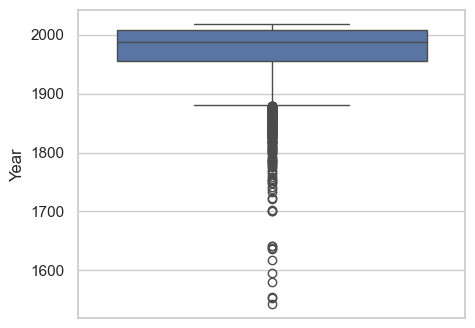

In [46]:
sns.boxplot(y = "Year", data=df_evolution); # There is not much information about shark attacks previous to 1880

### Cleaning of "Sex" (377 NaN)

In [47]:
df_evolution.rename({"Sex ":"Sex"}, axis = 1, inplace = True)

In [48]:
df_evolution["Sex"].describe() #6 different categories

count     4381
unique       6
top          M
freq      3781
Name: Sex, dtype: object

In [49]:
df_evolution["Sex"].value_counts()

Sex
M      3781
F       594
M         2
N         2
lli       1
.         1
Name: count, dtype: int64

In [50]:
df_evolution[(df_evolution["Sex"]=="M ") | (df_evolution["Sex"]=="N") | (df_evolution["Sex"]=="lli") | 
             (df_evolution["Sex"]==".")]

,Year,Sex,Fatal (Y/N),Age,Time
563,2014.0,M,N,42,15h30
1587,2005.0,M,N,NaN,NaN
1624,2004.0,lli,N,38,13h30
4938,1934.0,N,N,NaN,NaN
5437,1908.0,.,Y,NaN,NaN
6131,1801.0,N,Y,NaN,NaN


In [51]:
df_evolution[df_evolution["Sex"]=="M "] = "M"
df_evolution[(df_evolution["Sex"]=="N") | (df_evolution["Sex"]=="lli") | (df_evolution["Sex"]==".")] = None

C:\Users\gdcma\AppData\Local\Temp\ipykernel_18452\1603916124.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'M' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_evolution[df_evolution["Sex"]=="M "] = "M"


In [52]:
df_evolution["Sex"].value_counts()

Sex
M    3783
F     594
Name: count, dtype: int64

In [53]:
df_evolution["Sex"].isna().sum() # 377 subjects with unknown sex of a total of 4754. More than half the amount of "F".
                                     # Not imputable.
                                 # The first questions need the variable Sex, but as the number of missings is so big, I'll 
                                 # keep the missing values to show the total population attacks, and then by sex.

377

### Cleaning of "Fatal (Y/N)" (460 NaN)

In [57]:
df_evolution.rename({"Fatal (Y/N)":"Fatal"}, axis = 1, inplace = True)

In [59]:
df_evolution["Fatal"].describe() # 8 different categories

count     4293
unique       8
top          N
freq      3249
Name: Fatal, dtype: object

In [60]:
df_evolution["Fatal"].value_counts()

Fatal
N          3249
Y           970
UNKNOWN      61
 N            7
M             3
2017          1
N             1
y             1
Name: count, dtype: int64

In [67]:
df_evolution[(df_evolution["Fatal"] == " N") | (df_evolution["Fatal"] == "M") | (df_evolution["Fatal"] == "2017") | 
             (df_evolution["Fatal"] == "N ") | (df_evolution["Fatal"] == "y")]

,Year,Sex,Fatal,Age,Time
285,2016.0,M,M,22,Morning
563,M,M,M,M,M
786,2012.0,M,2017,57,Morning
1587,M,M,M,M,M
3942,1960.0,F,N,27,NaN
3944,1960.0,M,N,33,09h00
3946,1960.0,M,N,41,14h45
3948,1960.0,M,N,17,15h00
3949,1960.0,M,N,24,NaN
3951,1960.0,M,N,NaN,NaN


In [70]:
df_evolution[(df_evolution["Fatal"] == " N") | (df_evolution["Fatal"] == "N ") | (df_evolution["Fatal"] == "M")] = "N"
df_evolution[df_evolution["Fatal"] == "y"] = "Y"
df_evolution[(df_evolution["Fatal"] == "2017") | (df_evolution["Fatal"] == "UNKNOWN")] = None

In [71]:
df_evolution["Fatal"].value_counts()

Fatal
N    3260
Y     971
Name: count, dtype: int64

In [72]:
df_evolution["Fatal"].isna().sum() # 523 subjects with unknown sex of a total of 4754. More than half the amount of fatal attacks
                                        # Not imputable.
                                   # I'll keep the missing values

523

### Cleaning of "Age" (1397 NaN)

Time           1885

In [76]:
df_evolution["Age"].dtype

dtype('O')